In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from joblib import dump,load
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
import shap
import pickle
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

E:\Anaconda\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/mordred_1586_all.csv')

df

,PCE_max(%),ABC_acceptor,ABCGG_acceptor,nAcid_acceptor,nBase_acceptor,SpAbs_A_acceptor,SpMax_A_acceptor,SpDiam_A_acceptor,SpAD_A_acceptor,SpMAD_A_acceptor,...,SRW10_donor,TSRW10_donor,MW_donor,AMW_donor,WPath_donor,WPol_donor,Zagreb1_donor,Zagreb2_donor,mZagreb1_donor,mZagreb2_donor
0,6.93,58.097941,40.410316,0,0,99.467327,2.631228,5.073304,99.467327,1.326231,...,10.866528,108.616580,786.328023,7.084036,11282,86,268,321,18.000000,12.027778
1,3.09,58.097941,40.410316,0,0,99.467327,2.631228,5.073304,99.467327,1.326231,...,10.866528,108.616580,786.328023,7.084036,11282,86,268,321,18.000000,12.027778
2,8.33,82.274821,52.682889,0,0,139.585627,2.769425,5.342543,139.585627,1.342169,...,11.281636,136.985730,1131.510776,7.071942,32662,125,408,489,23.138889,17.388889
3,8.67,68.678783,46.494859,0,0,115.449721,2.708776,5.190384,115.449721,1.311929,...,11.450720,154.380658,1390.512098,7.475871,56543,151,492,584,25.611111,21.222222
4,8.46,82.274821,52.682889,0,0,139.585627,2.769425,5.342543,139.585627,1.342169,...,11.123093,120.909423,986.235691,8.018176,17497,106,332,403,21.166667,13.972222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,18.16,101.000010,67.229851,0,0,170.115355,2.746929,5.323745,170.115355,1.308580,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889
1582,10.70,79.948567,55.806323,0,0,134.270366,2.749301,5.245009,134.270366,1.303596,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889
1583,17.31,82.375644,57.591622,0,0,137.065638,2.752945,5.249094,137.065638,1.293072,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889
1584,17.81,95.504916,63.384238,0,0,161.382940,2.742219,5.296299,161.382940,1.301475,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889


In [3]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]
Y

0        6.93
1        3.09
2        8.33
3        8.67
4        8.46
        ...  
1581    18.16
1582    10.70
1583    17.31
1584    17.81
1585    18.77
Name: PCE_max(%), Length: 1586, dtype: float64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

In [6]:

with open('../model/Mordred_ANN_1586.pkl', 'rb') as f:
    ann_regressor = pickle.load(f)

In [7]:
ann_regressor.fit(X_train_stand, y_train)
y_train_hat = ann_regressor.predict(X_train_stand)
y_test_hat = ann_regressor.predict(X_test_stand)

In [8]:
np.savetxt('y_train_Mordred.csv', y_train)
np.savetxt('y_test_Mordred.csv', y_test)
np.savetxt('y_train_hat_Mordred.csv', y_train_hat)
np.savetxt('y_test_hat_Mordred.csv', y_test_hat)

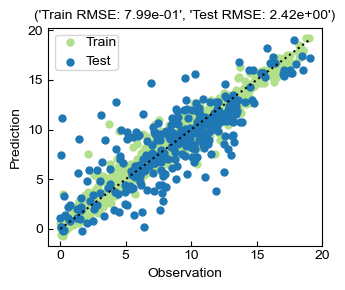

In [8]:

fontsize = 10
plt.figure(figsize=(3.5,3))
plt.style.use('default')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family']="Arial"
a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
plt.xlabel('Observation', fontsize=fontsize)
plt.ylabel('Prediction', fontsize=fontsize)
#plt.xticks([0, 0.6, 1.2, 1.8])
# plt.yticks([0, 0.6, 1.2, 1.8])
plt.tick_params(direction='in')
#plt.text(450,80,'Scaled',family="Arial",fontsize=fontsize)
#plt.xlim([0,2]) 
#plt.ylim([0,2])
plt.title(('Train RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
               'Test RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=fontsize)
b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
plt.rcParams['font.family']="Arial"
plt.tight_layout()
plt.savefig('../result/Mordred_ANN.jpg', dpi = 2048)
plt.show()

In [9]:
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr

In [10]:
PearsonCoefficient(y_test,y_test_hat)

0.8216852030886139

In [11]:
R2Score(y_test,y_test_hat)

0.6517518673453977

In [12]:
model=ann_regressor

In [13]:
background_distribution = shap.kmeans(X_train,10)

In [14]:
explainer = shap.KernelExplainer(ann_regressor.predict, background_distribution)

In [20]:
shap_values = explainer.shap_values(X_test)

  0%|                                                                                          | 0/318 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  0%|▎                                                                               | 1/318 [01:10<6:11:04, 70.23s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

  3%|██▋                                                                            | 11/318 [12:32<5:52:50, 68.96s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  4%|██▉                                                                            | 12/318 [13:43<5:54:59, 69.61s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

  7%|█████▍                                                                         | 22/318 [25:30<5:48:49, 70.71s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  7%|█████▋                                                                         | 23/318 [26:40<5:47:24, 70.66s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 10%|████████▏                                                                      | 33/318 [38:29<5:58:28, 75.47s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 11%|████████▍                                                                      | 34/318 [39:48<6:02:54, 76.67s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 14%|██████████▉                                                                    | 44/318 [51:42<5:25:16, 71.23s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 14%|███████████▏                                                                   | 45/318 [52:49<5:19:27, 70.21s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 17%|█████████████▎                                                               | 55/318 [1:04:34<5:06:19, 69.88s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 18%|█████████████▌                                                               | 56/318 [1:05:47<5:09:25, 70.86s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 21%|███████████████▉                                                             | 66/318 [1:17:38<5:01:57, 71.90s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 21%|████████████████▏                                                            | 67/318 [1:18:49<4:59:38, 71.63s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 24%|██████████████████▋                                                          | 77/318 [1:31:23<5:14:29, 78.30s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 25%|██████████████████▉                                                          | 78/318 [1:32:35<5:05:29, 76.37s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 28%|█████████████████████▎                                                       | 88/318 [1:44:58<4:39:23, 72.89s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 28%|█████████████████████▌                                                       | 89/318 [1:46:11<4:38:13, 72.90s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 31%|███████████████████████▉                                                     | 99/318 [1:58:25<4:27:09, 73.20s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 31%|███████████████████████▉                                                    | 100/318 [1:59:37<4:24:16, 72.74s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 35%|██████████████████████████▎                                                 | 110/318 [2:12:07<4:23:15, 75.94s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 35%|██████████████████████████▌                                                 | 111/318 [2:13:23<4:22:27, 76.08s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 38%|████████████████████████████▉                                               | 121/318 [2:25:52<4:07:53, 75.50s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 38%|█████████████████████████████▏                                              | 122/318 [2:27:06<4:05:12, 75.06s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 42%|███████████████████████████████▌                                            | 132/318 [2:39:13<3:44:56, 72.56s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 42%|███████████████████████████████▊                                            | 133/318 [2:40:25<3:43:21, 72.44s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 45%|██████████████████████████████████▏                                         | 143/318 [2:52:27<3:29:55, 71.98s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 45%|██████████████████████████████████▍                                         | 144/318 [2:53:43<3:32:21, 73.23s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 48%|████████████████████████████████████▊                                       | 154/318 [3:05:54<3:20:14, 73.26s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 49%|█████████████████████████████████████                                       | 155/318 [3:07:06<3:17:51, 72.83s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 52%|███████████████████████████████████████▍                                    | 165/318 [3:19:15<3:05:00, 72.55s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 52%|███████████████████████████████████████▋                                    | 166/318 [3:20:28<3:03:41, 72.51s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 55%|██████████████████████████████████████████                                  | 176/318 [3:32:41<2:53:21, 73.25s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 56%|██████████████████████████████████████████▎                                 | 177/318 [3:33:54<2:52:15, 73.30s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 59%|████████████████████████████████████████████▋                               | 187/318 [3:46:06<2:39:19, 72.98s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 59%|████████████████████████████████████████████▉                               | 188/318 [3:47:21<2:39:22, 73.55s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 62%|███████████████████████████████████████████████▎                            | 198/318 [3:59:32<2:26:54, 73.45s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 63%|███████████████████████████████████████████████▌                            | 199/318 [4:00:44<2:24:31, 72.87s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 66%|█████████████████████████████████████████████████▉                          | 209/318 [4:12:57<2:13:19, 73.39s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 66%|██████████████████████████████████████████████████▏                         | 210/318 [4:14:11<2:12:16, 73.49s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 69%|████████████████████████████████████████████████████▌                       | 220/318 [4:26:23<1:59:33, 73.20s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 69%|████████████████████████████████████████████████████▊                       | 221/318 [4:27:37<1:58:28, 73.28s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 73%|███████████████████████████████████████████████████████▏                    | 231/318 [4:40:47<2:07:22, 87.85s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 73%|███████████████████████████████████████████████████████▍                    | 232/318 [4:42:40<2:17:01, 95.60s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 76%|█████████████████████████████████████████████████████████                  | 242/318 [5:01:06<2:19:36, 110.22s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 76%|█████████████████████████████████████████████████████████▎                 | 243/318 [5:03:04<2:20:32, 112.43s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 80%|███████████████████████████████████████████████████████████▋               | 253/318 [5:21:21<1:52:44, 104.06s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 80%|███████████████████████████████████████████████████████████▉               | 254/318 [5:23:10<1:52:34, 105.54s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 83%|██████████████████████████████████████████████████████████████▎            | 264/318 [5:41:34<1:37:25, 108.26s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 83%|██████████████████████████████████████████████████████████████▌            | 265/318 [5:43:01<1:29:56, 101.82s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 86%|████████████████████████████████████████████████████████████████▊          | 275/318 [6:01:15<1:19:20, 110.70s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 87%|█████████████████████████████████████████████████████████████████          | 276/318 [6:03:06<1:17:32, 110.77s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 90%|█████████████████████████████████████████████████████████████████████▎       | 286/318 [6:21:25<58:02, 108.83s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 90%|█████████████████████████████████████████████████████████████████████▍       | 287/318 [6:23:20<57:03, 110.45s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 93%|███████████████████████████████████████████████████████████████████████▉     | 297/318 [6:42:12<39:20, 112.39s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 94%|████████████████████████████████████████████████████████████████████████▏    | 298/318 [6:44:05<37:27, 112.36s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

 97%|███████████████████████████████████████████████████████████████████████████▌  | 308/318 [7:01:39<15:44, 94.43s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 97%|███████████████████████████████████████████████████████████████████████████▊  | 309/318 [7:02:50<13:05, 87.29s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeli

In [18]:
type(shap_values)

numpy.ndarray

In [22]:
np.savetxt('shap_values_mordred.csv', shap_values, delimiter=',')


In [15]:
shap_values = np.loadtxt('shap_values_mordred.csv', delimiter=',')

In [16]:
expected_value =explainer.expected_value

In [17]:
feat_names1 = list(df.columns)

In [18]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 36  
plt.rcParams['figure.figsize'] = [4,6]
plt.rcParams['figure.dpi']= 300
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

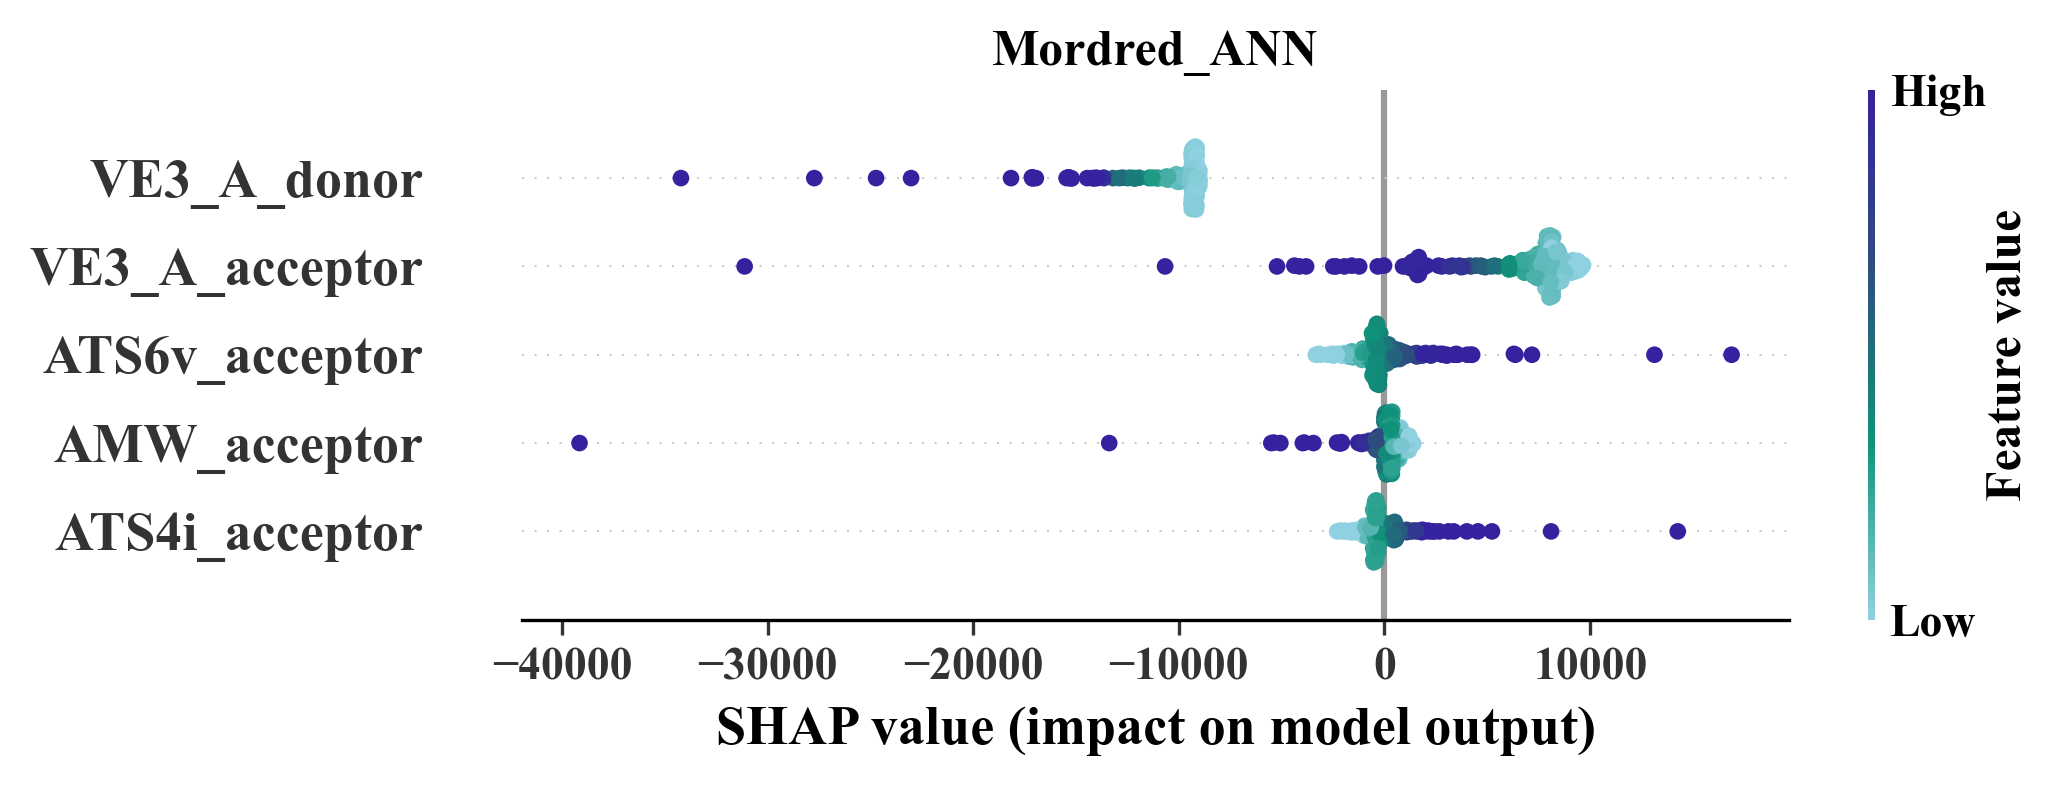

In [21]:
shap.initjs()

color01 = (143,209,225)
color02 = (15,147,121)
color03 = (46,78,126)
color04 = (53,34,159)


colors = [tuple([x / 255 for x in color]) for color in [color01, color02, color03, color04]]


gradient_colors = [colors[0], colors[1], colors[2], colors[3]]



n = 256
newcolors = []
for color in gradient_colors:
    rgba_color = cm.colors.to_rgba(color)
    newcolors.append(rgba_color)

newcmp = cm.colors.LinearSegmentedColormap.from_list('BlueYellow', newcolors, N=n)


plt.figure()

shap.summary_plot(shap_values,X_test,feature_names = feat_names1,plot_type='dot',max_display=5,show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)

plt.title(('Mordred_ANN'), fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../SHAP/SHAP_Mordred_ANN_1.tif', dpi = 300)

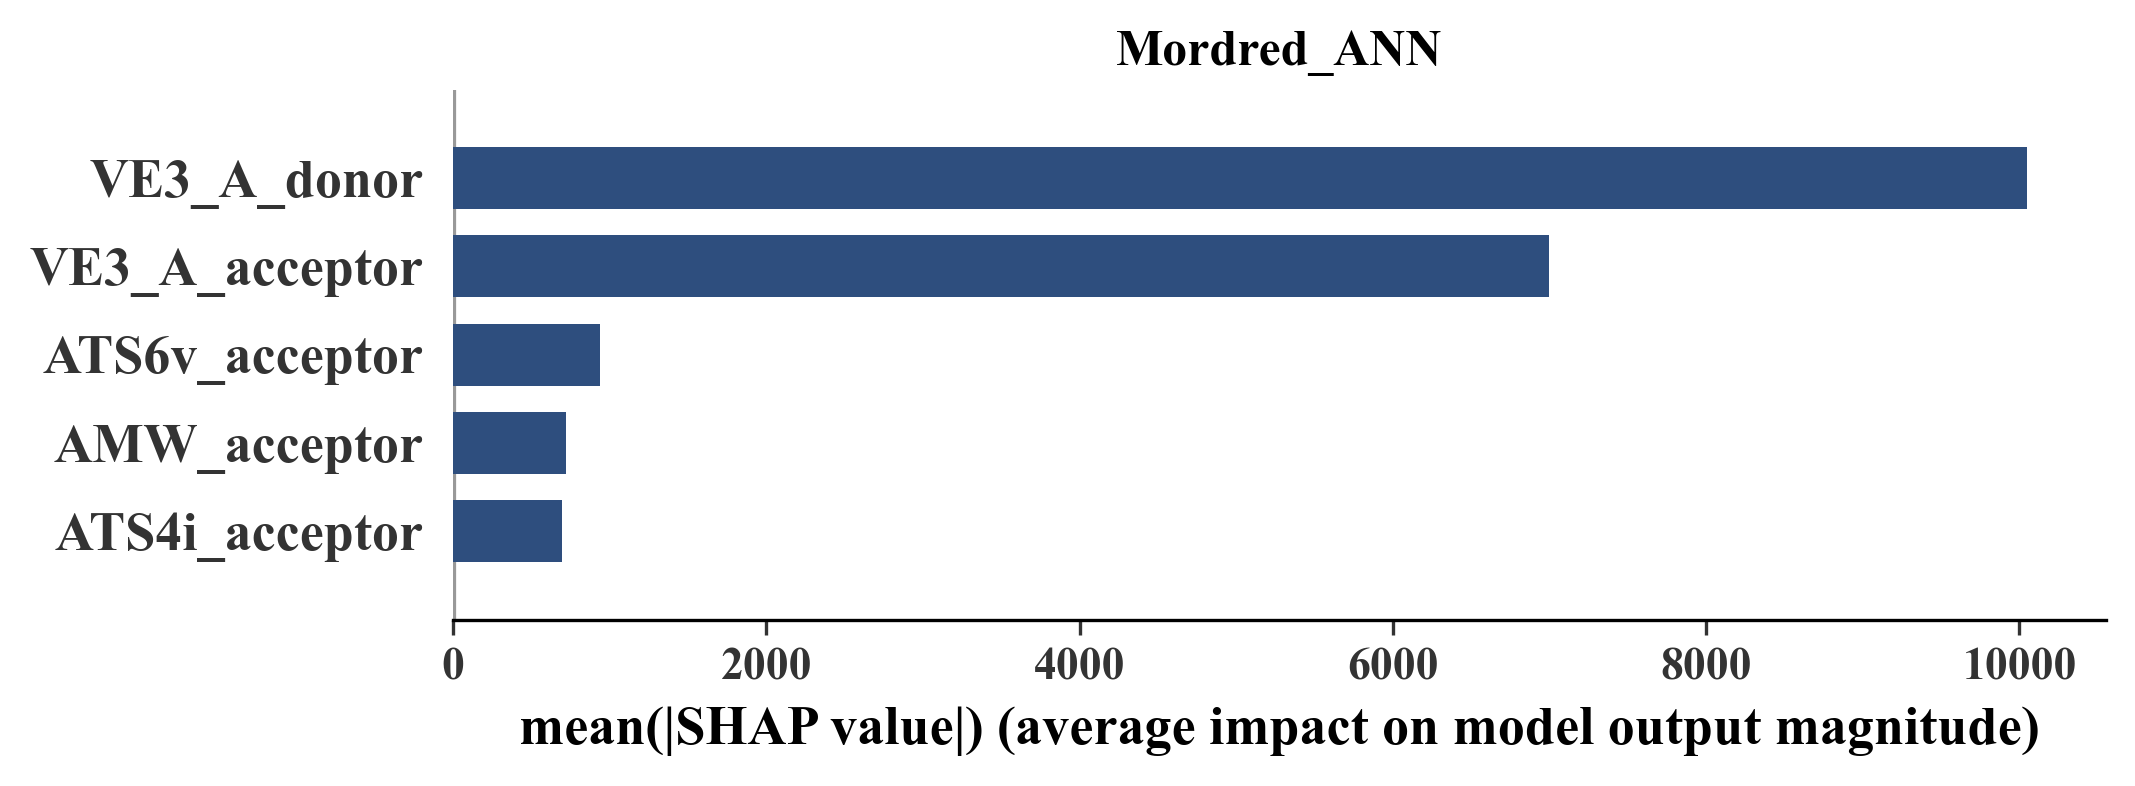

In [22]:

shap.summary_plot(shap_values, 
                  X_test, 
                  feature_names = feat_names1,
                  plot_type = "bar",
                  show = False,
                  sort = True,
                 color="#2e4e7e",max_display=5)
plt.title(('Mordred_ANN'), fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../SHAP/SHAP_Mordred_ANN_2.tif',dpi=300)